Sample Data:


,timestamp,location_id,vehicle_count,average_speed,congestion_level
0,2025-11-01 08:00,101,25,32.5,High
1,2025-11-01 08:00,102,12,41.2,Low
2,2025-11-01 09:00,101,30,28.5,High


Summary Statistics:


,location_id,vehicle_count,average_speed
count,3.000000,3.000000,3.000000
mean,101.333333,22.333333,34.066667
std,0.577350,9.291573,6.493330
min,101.000000,12.000000,28.500000
25%,101.000000,18.500000,30.500000
50%,101.000000,25.000000,32.500000
75%,101.500000,27.500000,36.850000
max,102.000000,30.000000,41.200000


Congestion Counts by Location:


congestion_level,High,Low
location_id,,
101,2,0
102,0,1


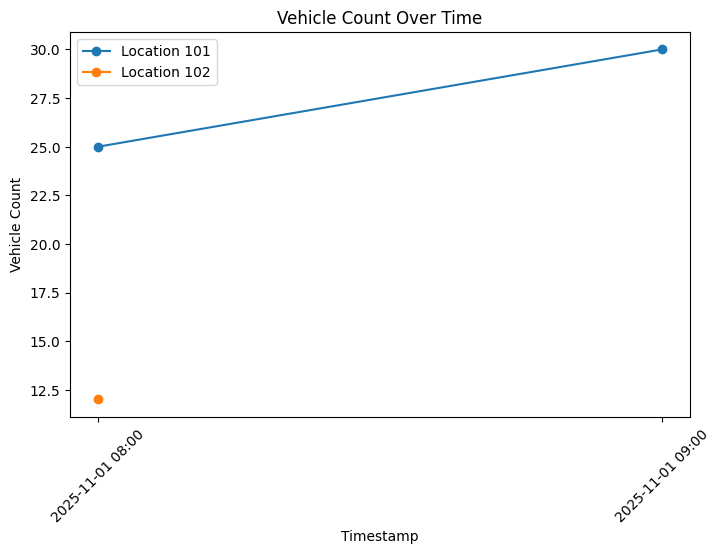

<Figure size 600x400 with 0 Axes>

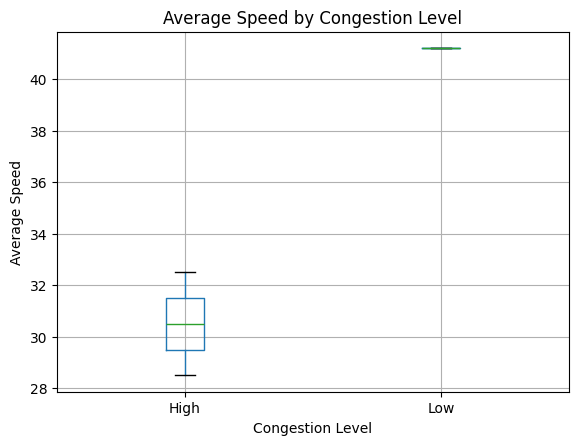

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'timestamp': ['2025-11-01 08:00', '2025-11-01 08:00', '2025-11-01 09:00'],
    'location_id': [101, 102, 101],
    'vehicle_count': [25, 12, 30],
    'average_speed': [32.5, 41.2, 28.5],
    'congestion_level': ['High', 'Low', 'High']
}
df = pd.DataFrame(data)

print("Sample Data:")
display(df.head())

print("Summary Statistics:")
display(df.describe())

congestion_counts = df.groupby(['location_id', 'congestion_level']).size().unstack(fill_value=0)
print("Congestion Counts by Location:")
display(congestion_counts)

plt.figure(figsize=(8,5))
for location in df['location_id'].unique():
    subset = df[df['location_id'] == location]
    plt.plot(subset['timestamp'], subset['vehicle_count'], marker='o', label=f'Location {location}')
plt.xlabel('Timestamp')
plt.ylabel('Vehicle Count')
plt.title('Vehicle Count Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(6,4))
df.boxplot(column='average_speed', by='congestion_level')
plt.title('Average Speed by Congestion Level')
plt.suptitle('')
plt.xlabel('Congestion Level')
plt.ylabel('Average Speed')
plt.show()
